In [1]:
import sys
sys.path.insert(0, '..')
from qsee.compilation.qcompilation import QuantumCompilation
from qsee.core import ansatz, state
import numpy as np
%load_ext autoreload
%autoreload 2

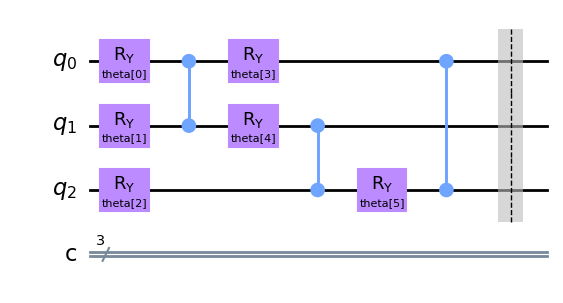

In [2]:
ansatz.polygongraph(3, 1).draw('mpl', style = 'clifford')

In [88]:
num_qubits = 2
random = np.random.uniform(0, np.pi, 2**num_qubits)
random = random/np.linalg.norm(random)
random_array = np.array(random)

In [104]:
random

array([0.75676064, 0.61660069, 0.17587764, 0.12721623])

In [105]:
import qiskit
from qiskit.primitives import Sampler
import time

import qiskit.quantum_info as qi
begin = time.time()

qc1 = qiskit.QuantumCircuit(num_qubits)
qc1.prepare_state(random)
qc = qiskit.QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
psi = qi.Statevector.from_instruction(qc).data
qc = qc.compose(qc1)
qc.measure_all()
sampler = Sampler()
result = sampler.run(qc, shots = 10000).result().quasi_dists[0].get(0, 0)
print(qi.Statevector.from_instruction(qc1).data)
print("p0_true", result)
print((np.conjugate(np.transpose(random_array)) @ psi) ** 2)
# print(time.time() - begin)

[0.75676064+0.j 0.61660069+0.j 0.17587764+0.j 0.12721623+0.j]
p0_true 0.3973
(0.390707554861614+0j)


In [6]:
num_qubits = 3
num_layers = 1
optimizer = 'adam'
random = np.random.uniform(-np.pi, np.pi, 2**num_qubits)
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = state.specific(random),
    optimizer = optimizer,
    metrics_func = ['loss_basic']
)
compiler.fast_fit(10, verbose = 2)

(0.2935427333512742-1.4098069715216743e-15j)
(0.025909455667814902-1.3809060244409772e-16j)
(0.06164677585296935-3.508871786738865e-16j)
(0.017567914401684644-5.646096935801329e-17j)
(0.3969180366283827-1.4213457567361096e-15j)
(0.062091976934647394-1.1213482570179243e-16j)
(0.23882824515820728-7.944153348817864e-16j)
(0.01163569333388056+2.1416163771650656e-17j)
(0.10897752151883408-2.9895458545274484e-16j)
(0.0025719362717574355-4.397973801186225e-17j)
(0.39691803662838315-1.3979599973556392e-15j)
(0.06209197693464738-1.3443191358068639e-16j)
(0.025666925903664588-4.91437948031687e-17j)
(0.2927250432951283-1.1821111702854639e-15j)
(0.03277128827371197-6.666076238993606e-17j)
(0.31568678927169075-1.2264975293689201e-15j)
(0.0009219248314890646-2.1327124361067545e-17j)
(0.12282815678828315-3.7501603493584865e-16j)
(0.08345370853169512-3.092053336649792e-16j)
(0.44851851915762897-1.9321631343941742e-15j)
(0.09497138295323267-3.367568081328274e-16j)
(0.4747292275945159-1.9887465404370436

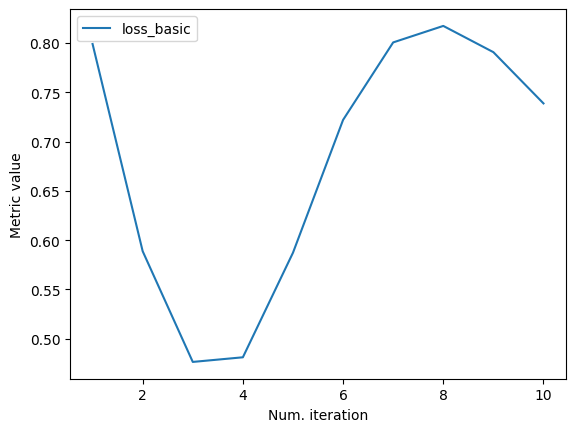

In [7]:
compiler.plot()

In [46]:
num_qubits = 4
num_layers = 1
optimizer = 'adam'
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, num_layers),
    vdagger = state.ame(num_qubits)
)
compiler.fit(num_steps = 20, verbose = 2)

Step 0: 0.9657872625098816
Step 10: 0.17609676476864333


In [50]:
compiler.save('test')

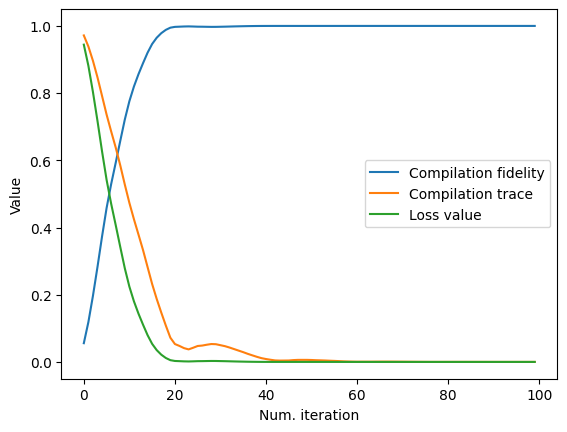

In [17]:
compiler.plot(metrics = ['compilation'])

In [ ]:
target_state = np.array(np.random.uniform(low= 0, high= 2 * np.pi, size=16))
compiler = QuantumCompilation.prepare(target_state).fit()

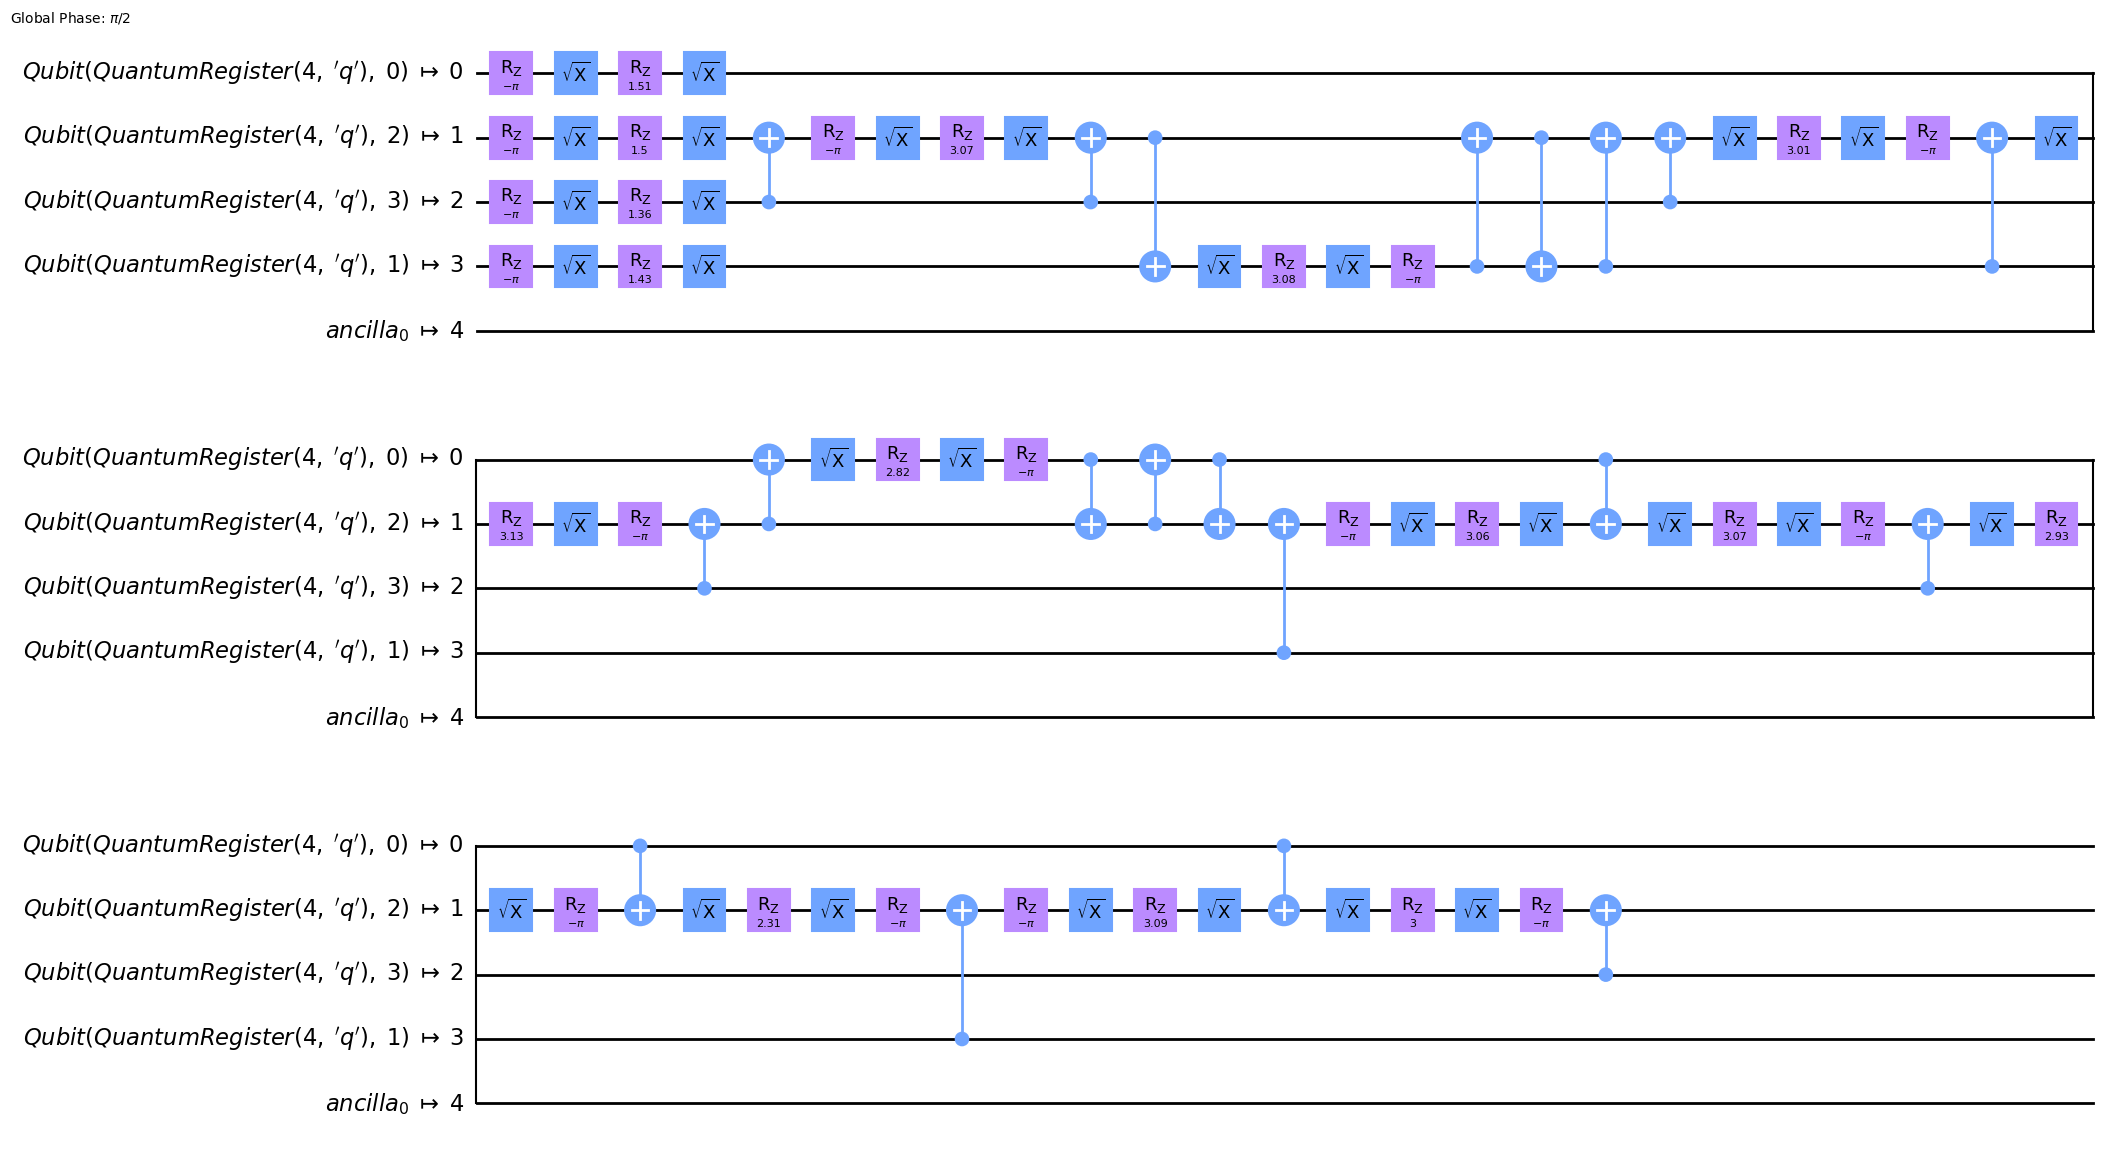

In [26]:
import qiskit
from qiskit.providers.fake_provider import FakeVigoV2

backend = FakeVigoV2()
qc_basis = qiskit.transpile(state.specific(target_state), backend)
qc_basis.draw(output='mpl')